In [1]:
# Referencing Crash Course AI #5

# 1.Find or create a dataset to train neural network

from emnist import extract_test_samples

# EMNIST letters chunk dataset
# Has 145600 images
print("imported EMNIST libraries")


imported EMNIST libraries


In [2]:

# x images, y labels
x, y = extract_test_samples('letters')

# convert pixels values from 0-255 to 0-1
# so that easier for NN to process
x = x / 255

# first 60000 images as training set, next 10000 images as test set
x_train, x_test = x[:18000], x[18000:20800]
# first 60000 labels as training set, next 10000 labels as test set
y_train, y_test = y[:18000], y[18000:20800]

# record number of samples in each dataset
# and number of pixels in each image
x_train = x_train.reshape(18000, 784)
x_test = x_test.reshape(2800, 784)

print("Extracted samples. Divided training and testing data sets.")

# images are 28x28 pixels
# each pixel is greyscale value between 0 and 255






Extracted samples. Divided training and testing data sets.


Image Label: m


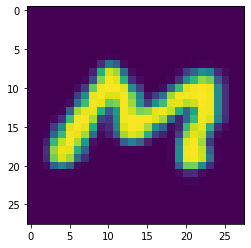

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img_index = 10000
img = x_train[img_index]
#print(img)
#chr() converts ASCII character to it's corresponding character
print("Image Label: " + chr(y_train[img_index]+96))
plt.imshow(img.reshape((28,28)))
#help(img.reshape)

In [4]:
# 2.build neural network
# multilayered perceptron neural network (MLP)
# can use python library sklearn
# sklearn has heaps machine learning algorithms
# will be using it's multilayered perceptron 

# For input layer
# each image is 28 x 28 pixels
# each pixel represented by single input neuron
# will have 784 neurons in total

# depending how dark a pixel is
# will have greyscale value between 0 and 1

# For output layer
# size of output layer depends on label types that 
# want neural network to guess
# since trying to guess letters 
# and there's 26 letters,
# so will have 26 output neurons

# For hidden layers
# can experiment
# try hidden layer containing 50 neurons

# Over span of epoch
# each of the 18000 images in the training data set
# will be processed by the input neurons
# hidden layer neuron will randomly pick aspects of each image
# to focus on
# output layer neurons will guess as to which image is which letter

# After each of the 18000 images are processed
# neural net will compare it's guess to the actual label
# and update weights and biases to give it better guess for the next image

# as epochs/iterations goes on, neural network prediction will keep getting better

#import ML libraries
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

#mlp1 = MLPClassifier(hidden_layer_sizes=(50,),max_iter=20,alpha=1e)
#help(MLPClassifier)





SyntaxError: invalid syntax (<ipython-input-4-c6ac28181e96>, line 43)

      price      brand    model  year   mileage
1      6300     toyota  cruiser  2008  274117.0
2      2899       ford       se  2011  190552.0
3      5350      dodge      mpv  2018   39590.0
4     25000       ford     door  2014   64146.0
5     27700  chevrolet     1500  2018    6654.0
...     ...        ...      ...   ...       ...
2495   7800     nissan    versa  2019   23609.0
2496   9200     nissan    versa  2018   34553.0
2497   9200     nissan    versa  2018   31594.0
2498   9200     nissan    versa  2018   32557.0
2499   9200     nissan    versa  2018   31371.0

[2499 rows x 5 columns]
Least Squares method using np.polyfit()
slope is -0.08134245905198012
intercept is 23021.775150244102 

Least Squares method using calculation formula
slope is -0.08134245905197965
intercept is 23021.77515024407 

Least Squares method using scipy.stats.linregress
slope is -0.08134245905197962
intercept is 23021.77515024407 

In line of best fit, 
slope is -0.08134245905198012
intercept is 23021.7

Text(0, 0.5, 'sum of squares value')

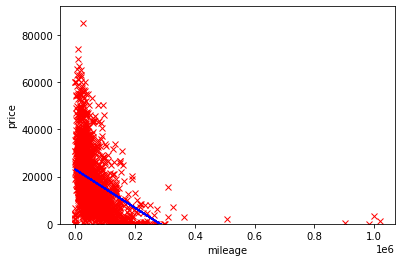

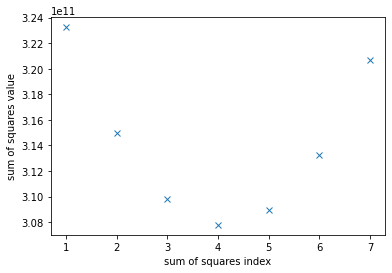

In [5]:
#Least Squares Method

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("USA_cars_datasets.csv")

df = pd.DataFrame(data,index=data.index)
df.index += 1

print(df[["price","brand","model","year","mileage"]])

price = df["price"]
brand = df["brand"]
model = df["model"]
year = df["year"]
mileage = df["mileage"]

x = mileage.values
y = price.values

mean_x = np.mean(x)
mean_y = np.mean(y)

m = 0
c = 0
n = len(x)

plt.figure(1)

plt.plot(x,y,'rx')

m,c = np.polyfit(x,y,1)
plt.plot(x,m*x+c,"b-")

plt.ylim(0,)
plt.xlabel("mileage")
plt.ylabel("price")

print("Least Squares method using np.polyfit()")
print("slope is",m)
print("intercept is",c,"\n")


# slope of best fit line defined as
# m = ()
# least squares line
#calculate_slope = (n*(sum(x*y))-sum(x)*sum(y))/(n*(sum(x^2))-(sum(x))^2)
#calculate_intercept = (sum(y)-calculate_slope * sum(x))/n

def slope_and_intercept():
    sum_of_xy = 0
    sum_of_x = 0
    sum_of_y = 0
    sum_of_x_squared = 0
    amount_of_elements = n
    for i in range(amount_of_elements):
        sum_of_xy += x[i]*y[i]
        sum_of_x += x[i]
        sum_of_y += y[i]
        sum_of_x_squared += np.square(x[i])
    slope_of_line = ((amount_of_elements*(sum_of_xy))-(sum_of_x*sum_of_y))/(amount_of_elements*(sum_of_x_squared)-np.square(sum_of_x))
    intercept_of_line = ((sum_of_y)-slope_of_line*sum_of_x)/amount_of_elements     
    
    return slope_of_line,intercept_of_line
a,b = slope_and_intercept()
#print(a,b)
print("Least Squares method using calculation formula")
print("slope is",a)
print("intercept is",b,"\n")


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Least Squares method using scipy.stats.linregress")
print("slope is",slope)
print("intercept is",intercept,"\n")

#Sum of squared residuals
def SSR(m,c):
    # SSR = sum(((c+m*xi)-yi)^2)
    # where (x,y) is xi,yi
    # and c = intercept, m = slope of best fit line
    # and (c+m*xi) is value xi, on best fit line
    # and yi is observed actual value from data at xi
    # hence calculating distance between line and observed value
    sum_of_squared_residuals = 0
    for i in range(n):
        sum_of_squared_residuals += np.square((m*x[i]+c)-y[i])
    return sum_of_squared_residuals

ssr_index = np.arange(1,8)
ssr_values = np.empty(7)

ssr_values[0] = SSR(-0.05,c)
ssr_values[1] = SSR(-0.06,c)
ssr_values[2] = SSR(-0.07,c)
ssr_values[3] = SSR(m,c)
ssr_values[4] = SSR(-0.09, c)
ssr_values[5] = SSR(-0.1,c)
ssr_values[6] = SSR(-0.11,c)

print("In line of best fit, ")
print("slope is",m)
print("intercept is",c)
print("it's sum of squares is ",ssr_values[3],"\n")

plt.figure(2)
plt.plot(ssr_index,ssr_values,"x")
plt.xlabel("sum of squares index")
plt.ylabel("sum of squares value")